In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [74]:
# Define marker/color sets and a consistent mapping from chain count -> marker/color
markers=['o', 's', '^', 'D', 'v']
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
# canonical order of chains used in many plots
canonical_chains = [1, 2, 5, 10, 20]
# mapping: chain count -> marker/color (keeps visuals consistent across cells)
marker_map = {chain: markers[i] for i, chain in enumerate(canonical_chains) if i < len(markers)}
color_map = {chain: colors[i] for i, chain in enumerate(canonical_chains) if i < len(colors)}
def get_marker(chain, fallback=None):
    if fallback is None:
        fallback = markers[0] if markers else 'o'
    return marker_map.get(chain, fallback)
def get_color(chain, fallback=None):
    if fallback is None:
        fallback = colors[0] if colors else 'k'
    return color_map.get(chain, fallback)

In [75]:
# read file except first line
SI_autocorrelation = np.loadtxt('autocorrelation_100x100x100_1linear.dat', skiprows=1)
qbar=5/9

Saved 01_autocorrelation.pdf


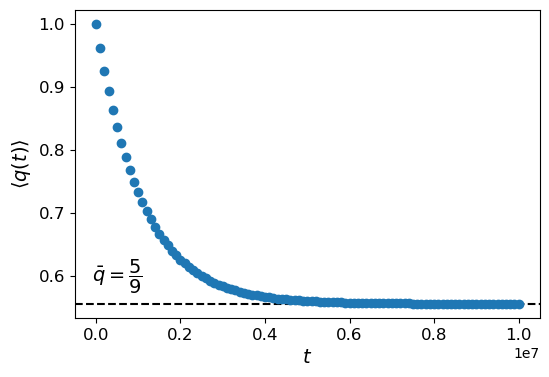

In [76]:
plt.figure(figsize=(6, 4))
plt.errorbar(SI_autocorrelation[:, 0], SI_autocorrelation[:, 1], yerr=SI_autocorrelation[:, 2], fmt='o', ecolor='r', capthick=2, zorder=-1)
plt.axhline(y=qbar, color='k', linestyle='--', label=r'$\langle q \rangle = \dfrac{5}{9}$', zorder=-2)
plt.text(-100000, 0.59, r'$\bar{q} = \dfrac{5}{9}$', fontsize=14)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\langle q(t) \rangle$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
out = '01_autocorrelation.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved 02_Ct.pdf


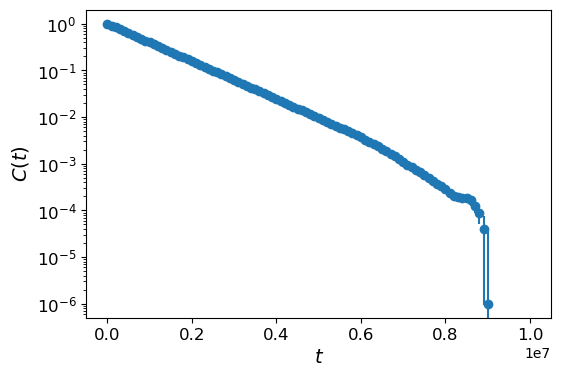

In [77]:
plt.figure(figsize=(6, 4))
plt.errorbar(SI_autocorrelation[:, 0], (SI_autocorrelation[:, 1]-qbar)/(1-qbar), yerr=SI_autocorrelation[:, 2], fmt='o', zorder=-1)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$C(t)$', fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
out = '02_Ct.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [78]:
mean_ring = np.loadtxt('mean_ring_length_100x100x100.dat', skiprows=1)

Saved 03_mean_ring.pdf


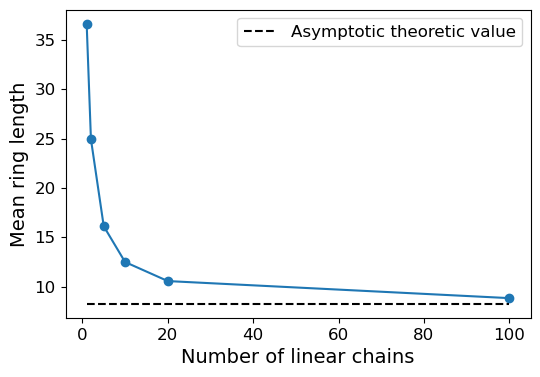

In [79]:
plt.figure(figsize=(6, 4))
plt.plot(mean_ring[:, 0], mean_ring[:, 1], '-o')
plt.plot([mean_ring[0, 0], mean_ring[-1, 0]], [8.26186, 8.26186], '--', color='k', label='Asymptotic theoretic value')  # horizontal line for theoretical value
plt.xlabel('Number of linear chains', fontsize=14)
plt.ylabel('Mean ring length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
out = '03_mean_ring.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
plt.legend(fontsize=12)
print('Saved', out)
plt.show()

In [80]:
sizes=['10x10x10', '20x20x20', '50x50x50', '100x100x100', '150x150x150']
data = {}
V = [1000, 8000, 125000, 1000000, 3375000]
for size in sizes:
    data[size] = np.loadtxt(f'rejection_rate_{size}.dat', skiprows=1)
n_chains=5
chains=[1,2,5,10,20]

Saved 04_rejection_V.pdf


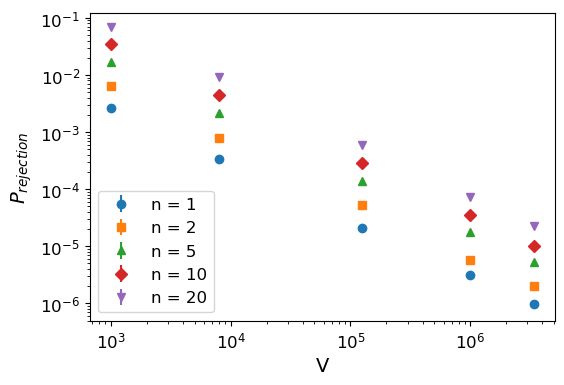

In [81]:
plt.figure(figsize=(6, 4))
# Use chain-based marker/color mapping so same n uses same visuals
for i in range(len(sizes)-1):
    for j in range(len(V)):
        chain = chains[j]
        m = get_marker(chain)
        c = get_color(chain)
        plt.errorbar(V[i], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], marker=m, color=c, markersize=6, linestyle='None')
i = len(sizes)-1
j = 0
# label first point for legend (use chain-based visuals)
chain = chains[j]
m = get_marker(chain)
c = get_color(chain)
plt.errorbar(V[i], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], marker=m, color=c, markersize=6, linestyle='None', label=f'n = {chain}')
for j in range(1,len(V)):
    chain = chains[j]
    m = get_marker(chain)
    c = get_color(chain)
    plt.errorbar(V[i], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], marker=m, color=c, markersize=6, linestyle='None', label=f'n = {chain}')
plt.xlabel('V', fontsize=14)
plt.ylabel(r'$P_{rejection}$', fontsize=14)
plt.legend(loc='lower left',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.yscale('log')
out = '04_rejection_V.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved 05_rejection_n.pdf


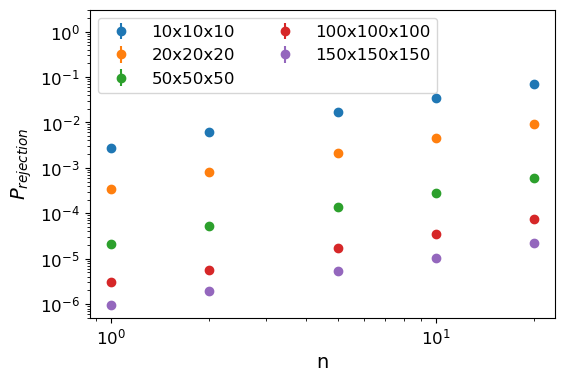

In [82]:
plt.figure(figsize=(6, 4))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for j in range(len(V)-1):
    for i in range(len(sizes)):
        plt.errorbar(chains[j], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], color=colors[i], fmt='o')
j = len(V)-1
i=0
plt.errorbar(chains[j], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], color=colors[i], fmt='o', label=f'{sizes[i]}')
for i in range(1,len(chains)):
    plt.errorbar(chains[j], data[sizes[i]][j, 1], yerr=data[sizes[i]][j, 2], color=colors[i], fmt='o', label=f'{sizes[i]}')
plt.xlabel('n', fontsize=14)
plt.ylabel(r'$P_{rejection}$', fontsize=14)
plt.legend(loc='upper left',ncol=2, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.ylim(5e-7,3)
out = '05_rejection_n.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [83]:
lk_data_1 = np.loadtxt('lk_int_approx_distribution_100x100x100_100blocks.dat')
lk_data_2 = np.loadtxt('lk_original_simplified_10x10x10_test.dat', skiprows=1)

Saved 06_lk_data1.pdf


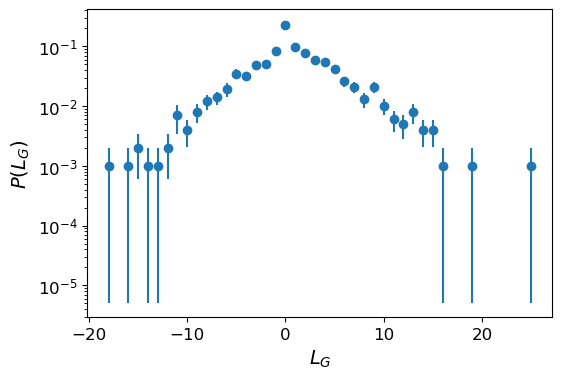

In [84]:
plt.figure(figsize=(6, 4))
plt.errorbar(lk_data_1[:,0], lk_data_1[:,1], yerr=lk_data_1[:,2], fmt='o', color='tab:blue')
plt.xlabel(r'$L_G$', fontsize=14)
plt.ylabel(r'$P(L_G)$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
out = '06_lk_data1.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved 07_lk_data2.pdf


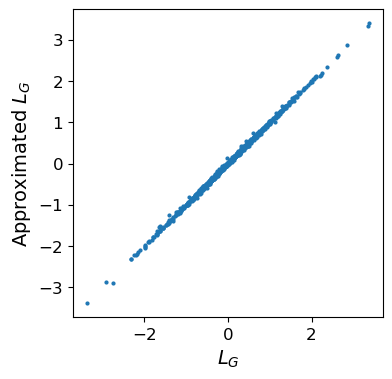

In [85]:
plt.figure(figsize=(4, 4))
plt.scatter(lk_data_2[:,0], lk_data_2[:,1], s=4)
plt.xlabel(r'$L_G$', fontsize=14)
plt.ylabel(r'Approximated $L_G$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
out = '07_lk_data2.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [86]:
sizes=['50x50x50', '100x100x100']
chains=[2,20]
data={}
for size in sizes:
    for chain in chains:
        data[size, chain] = np.loadtxt(f'ring_with_winding_chains_length_distribution_{size}_{chain}linear.dat', skiprows=1)

Saved 08_ring_length.pdf


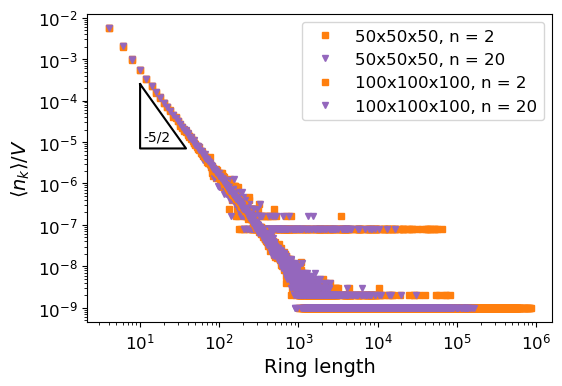

In [87]:
plt.figure(figsize=(6, 4))
for i in range(len(sizes)):
    for j in range(len(chains)):
        chain = chains[j]
        m = get_marker(chain)
        c = get_color(chain)
        plt.plot(data[sizes[i], chains[j]][:,0], data[sizes[i], chains[j]][:,1], marker=m, color=c, markersize=4, linestyle='None', label=f'{sizes[i]}, n = {chain}')
plt.plot([10, 38, 10, 10], [2.5e-4, 7e-6, 7e-6, 2.5e-4], 'k')
plt.text(11, 1.1e-5, r'-5/2', fontsize=10)
plt.xlabel('Ring length', fontsize=14)
plt.ylabel(r'$\langle n_k \rangle/V$', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.yscale('log')
out = '08_ring_length.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

In [88]:
multiplicity_data_3x3_1 = np.loadtxt('configs_3x3_1linear_sorted.dat', skiprows=1)[:,1]
multiplicity_data_3x3_2 = np.loadtxt('configs_3x3_2linear_sorted.dat', skiprows=1)[:,1]
multiplicity_data_4x4 = np.loadtxt('configs_4x4_1linear_sorted.dat', skiprows=1)[:,1]

In [89]:
multiplicity_3x3_1=np.array(multiplicity_data_3x3_1)
sumMult_3x3=sum(multiplicity_3x3_1)
multiplicity_3x3_1=multiplicity_3x3_1/sumMult_3x3

multiplicity_3x3_2=np.array(multiplicity_data_3x3_2)
sumMult_3x3=sum(multiplicity_3x3_2)
multiplicity_3x3_2=multiplicity_3x3_2/sumMult_3x3

multiplicity_4x4=np.array(multiplicity_data_4x4)
sumMult_4x4=sum(multiplicity_4x4)
multiplicity_4x4=multiplicity_4x4/sumMult_4x4

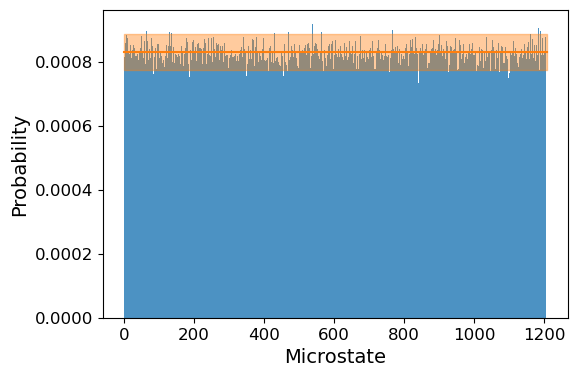

In [90]:
plt.figure(figsize=(6,4))
plt.hist([i for i in range(1,len(multiplicity_3x3_1)+1)], bins=[0.5+i for i in range(len(multiplicity_3x3_1)+1)], weights=multiplicity_3x3_1, alpha=0.8)
# Plot horizontal line of height 1/len(data)
yline=1/len(multiplicity_3x3_1)
yerror=np.sqrt(sumMult_3x3/len(multiplicity_3x3_1))/sumMult_3x3
# Calculate chi-square
plt.plot([0, len(multiplicity_3x3_1)+2], [yline, yline], color='tab:orange')
plt.fill_between([0, len(multiplicity_3x3_1)+2], [yline-yerror,yline-yerror], [yline+yerror,yline+yerror], color='tab:orange', alpha=0.4)
plt.xlabel('Microstate', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

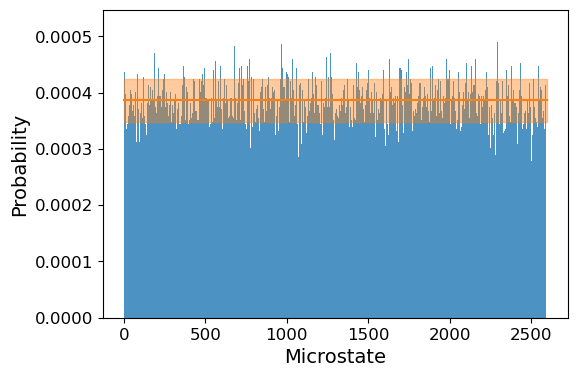

In [91]:
plt.figure(figsize=(6,4))
plt.hist([i for i in range(1,len(multiplicity_3x3_2)+1)], bins=[0.5+i for i in range(len(multiplicity_3x3_2)+1)], weights=multiplicity_3x3_2, alpha=0.8)
# Plot horizontal line of height 1/len(data)
yline=1/len(multiplicity_3x3_2)
yerror=np.sqrt(sumMult_3x3/len(multiplicity_3x3_2))/sumMult_3x3
# Calculate chi-square
plt.plot([0, len(multiplicity_3x3_2)+2], [yline, yline], color='tab:orange')
plt.fill_between([0, len(multiplicity_3x3_2)+2], [yline-yerror,yline-yerror], [yline+yerror,yline+yerror], color='tab:orange', alpha=0.4)
plt.xlabel('Microstate', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

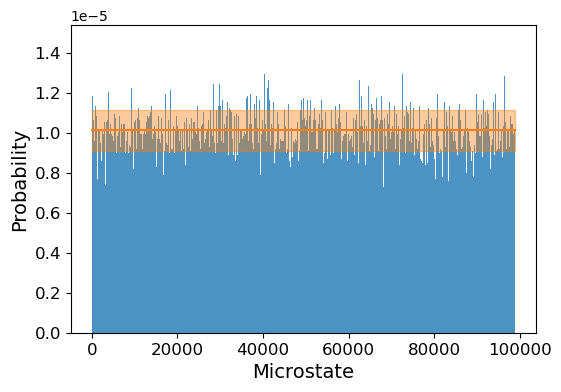

In [92]:
plt.figure(figsize=(6,4))
plt.hist([i for i in range(1,len(multiplicity_4x4)+1)], bins=[0.5+i for i in range(len(multiplicity_4x4)+1)], weights=multiplicity_4x4, alpha=0.8)
# Plot horizontal line of height 1/len(data)
yline=1/len(multiplicity_4x4)
yerror=np.sqrt(sumMult_4x4/len(multiplicity_4x4))/sumMult_4x4
# Calculate chi-square
plt.plot([0, len(multiplicity_4x4)+2], [yline, yline], color='tab:orange')
plt.fill_between([0, len(multiplicity_4x4)+2], [yline-yerror,yline-yerror], [yline+yerror,yline+yerror], color='tab:orange', alpha=0.4)
plt.xlabel('Microstate', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [93]:
unique, counts = np.unique(multiplicity_data_4x4, return_counts=True)

In [94]:
M = int(len(multiplicity_data_4x4))
K=int(np.sum(multiplicity_data_4x4))
p=1/M

In [95]:
from scipy.stats import binom
# Compute prediction counts using binomial PMF to avoid large integer overflows
k_vals = np.arange(int(unique[0]), int(unique[-1]) + 1)
prediction_counts = binom.pmf(k_vals, K, p) * M

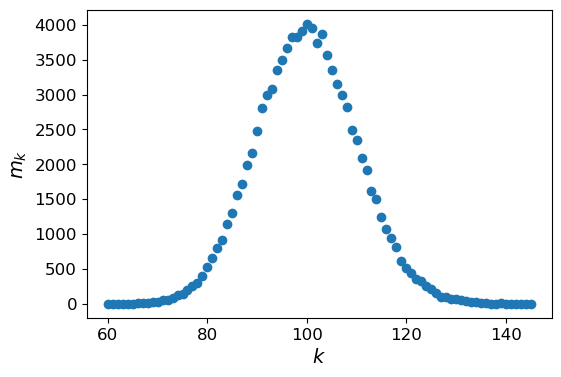

In [96]:
plt.figure(figsize=(6,4))
plt.plot(unique, counts, 'o')
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$m_k$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('12_unique_counts.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
chains=[2,5,10,20]
data={}
for chain in chains:
    data[chain] = np.loadtxt(f'distribution_one_length_100x100x100_{chain}linear_density_90%_91%.dat', skiprows=1)

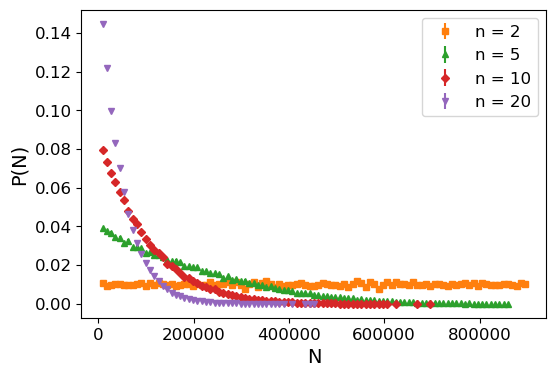

In [98]:
plt.figure(figsize=(6,4))
for chain in chains:
    x = data[chain][:,0]
    y = data[chain][:,1]
    err = data[chain][:,2]
    m = get_marker(chain)
    c = get_color(chain)
    plt.errorbar(x, y, yerr=err, marker=m, color=c, markersize=4, linestyle='None', label=f'n = {chain}')
plt.xlabel('N', fontsize=14)
plt.ylabel('P(N)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('Figure_SI_chain_length_distribution.pdf', dpi=300,  bbox_inches='tight')
plt.show()

In [99]:
chains=[1, 2,5,10,20]
data_reesq={}
data_noverlap={}
data_interchain={}
data_ncontacts={}
for chain in chains:
    data_reesq[chain]=np.loadtxt(f"reesq_50x50x50_{chain}linear.dat")

data_interchain[1]=np.loadtxt("inter_chain_contacts_1linear.dat")
data_interchain[2]=np.loadtxt(f"inter_chain_contacts_50x50x50_2linear_length_56563_pm10%.dat", skiprows=1)
data_interchain[5]=np.loadtxt(f"inter_chain_contacts_50x50x50_5linear_length_22625_pm10%.dat", skiprows=1)
data_interchain[10]=np.loadtxt(f"inter_chain_contacts_50x50x50_10linear_length_11313_pm10%.dat", skiprows=1)
data_interchain[20]=np.loadtxt(f"inter_chain_contacts_50x50x50_20linear_length_5656_pm10%.dat", skiprows=1)

data_noverlap[1]=np.loadtxt("n_overlapping_self_replicas_vs_length_1linear.dat")
data_noverlap[2]=np.loadtxt(f"n_overlapping_chains_50x50x50_2linear_length_56563_pm10%.dat")
data_noverlap[5]=np.loadtxt(f"n_overlapping_chains_50x50x50_5linear_length_22625_pm10%.dat")
data_noverlap[10]=np.loadtxt(f"n_overlapping_chains_50x50x50_10linear_length_11313_pm10%.dat")
data_noverlap[20]=np.loadtxt(f"n_overlapping_chains_50x50x50_20linear_length_5656_pm10%.dat")

data_ncontacts[1]=np.loadtxt(f"contact_probability_50x50x50_1linear.dat")
data_ncontacts[2]=np.loadtxt(f"contact_probability_50x50x50_2linear.dat", skiprows=1)
data_ncontacts[5]=np.loadtxt(f"contact_probability_50x50x50_5linear.dat", skiprows=1)
data_ncontacts[10]=np.loadtxt(f"contact_probability_50x50x50_10linear.dat", skiprows=1)
data_ncontacts[20]=np.loadtxt(f"contact_probability_50x50x50_20linear.dat", skiprows=1)

In [100]:
def power_law(x, a, b):
    return a * x**b

Saved Figure_SI_Metric.pdf


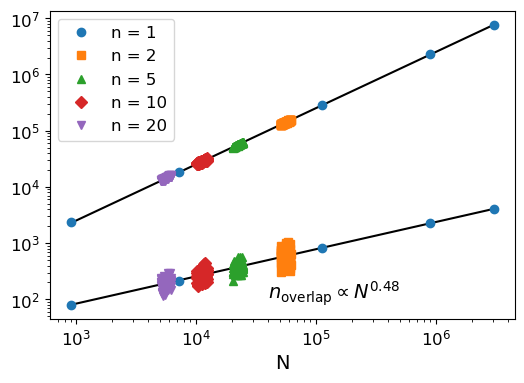

In [101]:
# Plot reesq, noverlap and interchain data loaded above
plt.figure(figsize=(6,4))

# Plot noverlap data points
for chain in chains:
    dn = data_noverlap.get(chain) if isinstance(data_noverlap, dict) else data_noverlap[chain]
    dn = np.array(dn)
    if dn.ndim >= 2 and dn.shape[1] >= 2:
        x = dn[:, 0]
        y = dn[:, 1]
        m = get_marker(chain, markers[chains.index(chain)])
        c = get_color(chain, colors[chains.index(chain)])
        plt.plot(x, y, marker=m, color=c, markersize=6, linestyle='None', label=f'n = {chain}')

# Fit for n=1 noverlap data
if 'data_noverlap' in globals() and 1 in data_noverlap:
    dn = np.array(data_noverlap[1])
    if dn.ndim >= 2 and dn.shape[1] >= 2:
        params, cov = curve_fit(power_law, dn[:,0], dn[:,1])
        a_fit_noverlap, b_fit_noverlap = params
        x_fit_noverlap = np.linspace(float(np.min(dn[:,0])), float(np.max(dn[:,0])), 200)
        y_fit_noverlap = power_law(x_fit_noverlap, a_fit_noverlap, b_fit_noverlap)
        plt.plot(x_fit_noverlap, y_fit_noverlap, 'k-', zorder=-1)
        plt.text(4e4, 1e2, r"$n_{\rm overlap} \propto N^{%.2f}$" % b_fit_noverlap, color='k', fontsize=14)
else:
    print('Warning: data_noverlap[1] not available; skipping noverlap fit.')

# Plot interchain contact data points
for chain in chains:
    di = data_interchain.get(chain) if isinstance(data_interchain, dict) else data_interchain[chain]
    di = np.array(di)
    if di.ndim >= 2 and di.shape[1] >= 2:
        x = di[:, 0]
        y = di[:, 1]
        m = get_marker(chain, markers[chains.index(chain)])
        c = get_color(chain, colors[chains.index(chain)])
        plt.plot(x, y, marker=m, color=c, markersize=6, linestyle='None')
        


# Fit for interchain contact
if 'data_ncontacts' in globals() and 1 in data_ncontacts:
    dn = np.array(data_interchain[1])
    if dn.ndim >= 2 and dn.shape[1] >= 2:
        params, cov = curve_fit(power_law, dn[:,0], dn[:,1])
        a_fit, b_fit = params
        x_fit = np.linspace(float(np.min(dn[:,0])), float(np.max(dn[:,0])), 200)
        y_fit = power_law(x_fit, a_fit, b_fit)
        plt.plot(x_fit, y_fit, 'k-', zorder=-1)
else:
    print('Warning: data_ncontacts[1] not available; skipping contacts fit.')

plt.xlabel('N', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('log')
out = 'Figure_SI_Metric.pdf'
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()

Saved Contact_probability_seqsep_and_Ree_seqsep.pdf


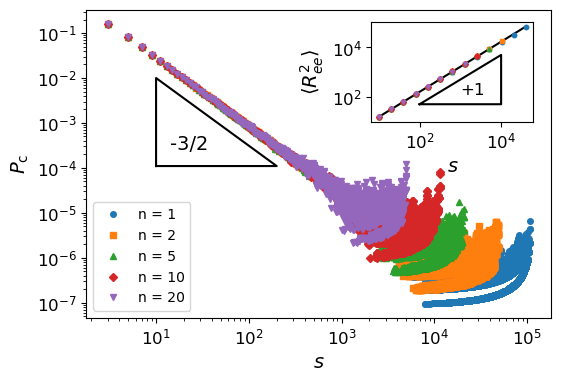

In [102]:
# Adapted: plot contact probability from `data_ncontacts` (fallback to `contact_prob1_data`) and inset `data_reesq`
plt.figure(figsize=(6, 4))
ax1 = plt.gca()

# safe defaults for plotting symbols/colors
_markers = globals().get('markers', ['o', 's', '^', 'D', 'v'])
_colors = globals().get('colors', ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
_folders = globals().get('folders', [])
_chains = globals().get('chains', [])

# if chains list is empty, infer from available data keys
if (not _chains) and ('data_ncontacts' in globals()):
    try:
        _chains = sorted([int(k) for k in data_ncontacts.keys()])
    except Exception:
        _chains = list(data_ncontacts.keys())

# helper to get marker/color for a chain with a fallback to positional lists
def _marker_for(chain, idx_fallback=0):
    try:
        return get_marker(chain, _markers[idx_fallback % len(_markers)])
    except Exception:
        return _markers[idx_fallback % len(_markers)]

def _color_for(chain, idx_fallback=0):
    try:
        return get_color(chain, _colors[idx_fallback % len(_colors)])
    except Exception:
        return _colors[idx_fallback % len(_colors)]

plotted_any = False

# Prefer data_ncontacts per chain if present
if 'data_ncontacts' in globals():
    for i, chain in enumerate(_chains):
        if chain in data_ncontacts:
            arr = np.array(data_ncontacts[chain])
            if arr.ndim >= 2 and arr.shape[1] >= 2:
                m = _marker_for(chain, i)
                c = _color_for(chain, i)
                ax1.plot(arr[:, 0], arr[:, 1], marker=m, color=c, markersize=4, linestyle='None', label=f'n = {chain}')
                plotted_any = True

# Fallback: use contact_prob1_data keyed by folder names (if available)
if not plotted_any and 'contact_prob1_data' in globals():
    for i, f in enumerate(_folders):
        if f in contact_prob1_data:
            d = np.array(contact_prob1_data[f])
            if d.ndim >= 2 and d.shape[1] >= 2:
                ax1.plot(d[:, 0], d[:, 1], _markers[i % len(_markers)], color=_colors[i % len(_colors)], markersize=3, label=f)
                plotted_any = True

if not plotted_any:
    print('No contact-probability data found in `data_ncontacts` or `contact_prob1_data`.')

# Reference line and styling
ax1.plot([10, 200, 10, 10], [1.1e-4, 1.1e-4, 1e-2, 1.1e-4], '-', color='k', zorder=-10)
ax1.text(14, 2.5e-4, "-3/2", fontsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel(r'$s$', fontsize=14)
ax1.set_ylabel(r'$P_{\rm c}$', fontsize=14)
ax1.legend(fontsize=10, loc="lower left")

# Inset axis for Re^2 data (prefer `data_reesq`, fallback to `reesq1_data` keyed by folder)
ax2 = plt.axes([0.6, 0.6, 0.27, 0.25])
plotted_reesq = False

# show reesq for chain 1 if present
if 'data_reesq' in globals() and 1 in data_reesq:
    dr = np.array(data_reesq[1])
    m = _marker_for(1, 0)
    c = _color_for(1, 0)
    if dr.ndim >= 2:
        if dr.shape[1] > 2:
            ax2.errorbar(dr[:, 0], dr[:, 1], yerr=dr[:, 2], marker=m, markersize=3, linestyle='None', color=c)
        else:
            ax2.plot(dr[:, 0], dr[:, 1], marker=m, markersize=3, color=c, linestyle='None')
        plotted_reesq = True

if 'data_reesq' in globals():
    avail = [c for c in _chains if c in data_reesq]
    for i, chain in enumerate(avail):
        dr = np.array(data_reesq[chain])
        if dr.ndim >= 2:
            m = _marker_for(chain, i)
            c = _color_for(chain, i)
            if dr.shape[1] > 2:
                ax2.errorbar(dr[:, 0], dr[:, 1], yerr=dr[:, 2], marker=m, markersize=3, linestyle='None', color=c)
            else:
                ax2.plot(dr[:, 0], dr[:, 1], marker=m, markersize=3, color=c, linestyle='None')
            plotted_reesq = True
    # Fit aggregated if available
    if avail:
        x = np.concatenate([np.array(data_reesq[c])[:, 0] for c in avail])
        y = np.concatenate([np.array(data_reesq[c])[:, 1] for c in avail])
        z = np.polyfit(np.log(x), np.log(y), 1)
        p = np.poly1d(z)
        xx = np.sort(x)
        ax2.plot(xx, np.exp(p(np.log(xx))), 'k', zorder=-10)
        ax2.plot([10**2, 10**4, 10**4, 10**2], [0.5*10**2, 0.5*10**2, 0.5*10**4, 0.5*10**2], '-', color='k', zorder=-10)
        ax2.text(10**3, 1.2*10**2, r"+1", fontsize=12)

if not plotted_reesq:
    ax2.text(0.5, 0.5, 'No Re^2 data', ha='center')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'$s$', fontsize=14)
ax2.set_ylabel(r'$\langle R_{ee}^2\rangle$', fontsize=14)

# Save and show
out = "Contact_probability_seqsep_and_Ree_seqsep.pdf"
plt.savefig(out, dpi=300, bbox_inches='tight')
print('Saved', out)
plt.show()